In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [21]:
df=pd.read_csv('data.csv',header=None)
df.columns=['a','b']

In [86]:
X=np.array(df['a'])
Y=np.array(df['b'])
X_tr=np.array(df['a'])[:70]
Y_tr=np.array(df['b'])[:70]
X_t=np.array(df['a'])[70:]
Y_t=np.array(df['b'])[70:]
X_t

array([31.588117  , 53.66093226, 46.68222865, 43.10782022, 70.34607562,
       44.49285588, 57.5045333 , 36.93007661, 55.80573336, 38.95476907,
       56.9012147 , 56.86890066, 34.3331247 , 59.04974121, 57.78822399,
       54.28232871, 51.0887199 , 50.28283635, 44.21174175, 38.00548801,
       32.94047994, 53.69163957, 68.76573427, 46.2309665 , 68.31936082,
       50.03017434, 49.23976534, 50.03957594, 48.14985889, 25.12848465])

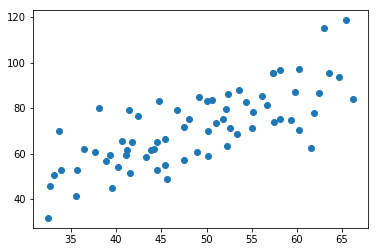

In [57]:
plt.scatter(X,Y)

In [58]:
import tensorflow as tf

In [125]:
w=tf.Variable(5.0)
b=tf.Variable(2.0)

# initialize error with 0 and proceed
error = 0

# for every datapoint in X and Y
for x,y in zip(X_tr,Y_tr):
    
    # predict the output value from neural network
    
    # i.e weights*inputs+biases 
    y_hat = w*x + b
    
    # calculate the error and minimize it
    error += (y-y_hat)**2

optimizer=tf.train.AdamOptimizer().minimize(error)  
     

In [126]:
# define the number of training steps
training_steps = 20000

# initialize the variables
init = tf.global_variables_initializer()


# initialize and run the model
with tf.Session() as sess:
    sess.run(init)
    
    # train the model defined number of times
    # i.e it fixes the weights so many number of times
    for step in range(training_steps):
        sess.run(optimizer)
    
        final_weight, final_bias = sess.run([w,b])
    print("Weight: {}".format(final_weight))
    print("Bias: {}".format(final_bias))

Weight: 1.3914073705673218
Bias: 3.4148290157318115


In [127]:
ypred=final_weight*X_tr+final_bias
ypred



array([48.63883178, 77.75327793, 89.02862269, 69.47278393, 86.6393673 ,
       80.1400764 , 76.06270776, 58.09653577, 70.34853859, 76.53330643,
       66.61217631, 79.04009439, 64.865013  , 84.35086791, 82.34548442,
       71.5324132 , 65.59292322, 87.31297402, 66.8889462 , 57.42483504,
       95.5118277 , 94.43520557, 69.48053264, 61.26348459, 75.5526042 ,
       86.02382836, 83.15639021, 91.92998982, 68.44589714, 73.75987772,
       76.07968209, 52.9041699 , 62.46125582, 84.34539883, 83.42694127,
       66.64111839, 89.53768946, 49.46183041, 54.1121612 , 55.83701288,
       65.40983092, 63.68820675, 73.08697292, 64.4567228 , 91.06998806,
       48.8707773 , 59.30334835, 77.95958677, 50.53374733, 93.44881868,
       56.45503313, 65.33598849, 59.90532597, 61.4652856 , 74.49993186,
       80.05089761, 60.98810269, 90.37041164, 71.8774808 , 60.60540814,
       60.71578976, 73.24454126, 76.29458514, 73.17371305, 50.22832093,
       58.45598434, 81.51506573, 83.22881114, 87.27385814, 53.05

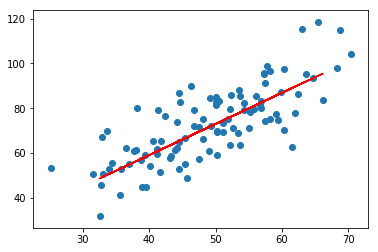

In [129]:
plt.plot(X_tr,ypred,'r')
plt.scatter(X,Y)